<a href="https://www.kaggle.com/code/mosesmoncy/car-evaluation-rating-prediction?scriptVersionId=127192181" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Making a car purchase decision can be daunting. With so many options available in the market, it can be challenging to determine which car is best suited for you. Luckily, with advancements in technology, we can now leverage machine learning to predict the evaluation rating of a car. In this project, we will explore how machine learning can help in making an informed car purchase decision.

The automobile industry has come a long way in the last few decades. Today, there are numerous brands, models, and car types available in the market. However, with so many options available, it can be challenging to determine which car is best suited for your needs. To make an informed decision, we need a reliable rating system that can assess the car's features and functionality. This is where machine learning comes into play. In this project, we will explore how machine learning can help in predicting the evaluation rating of a car.

Model is created using Classifcation models to predict evaluated result as         "Unacceptable",
"Acceptable",
"Good",
"Very Good"

In [1]:
import numpy as np 
import pandas as pd

In [2]:
#Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import seaborn as sns
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
a=pd.read_csv('/kaggle/input/dataset-csv/car_evaluation.csv')
a

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
# read first five data

a.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
# read last five data

a.tail()

,vhigh,vhigh.1,2,2.1,small,low,unacc
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [6]:
a.shape

(1727, 7)

In [7]:
a.describe

<bound method NDFrame.describe of       vhigh vhigh.1      2   2.1  small   low  unacc
0     vhigh   vhigh      2     2  small   med  unacc
1     vhigh   vhigh      2     2  small  high  unacc
2     vhigh   vhigh      2     2    med   low  unacc
3     vhigh   vhigh      2     2    med   med  unacc
4     vhigh   vhigh      2     2    med  high  unacc
...     ...     ...    ...   ...    ...   ...    ...
1722    low     low  5more  more    med   med   good
1723    low     low  5more  more    med  high  vgood
1724    low     low  5more  more    big   low  unacc
1725    low     low  5more  more    big   med   good
1726    low     low  5more  more    big  high  vgood

[1727 rows x 7 columns]>

In [8]:
a.dtypes

vhigh      object
vhigh.1    object
2          object
2.1        object
small      object
low        object
unacc      object
dtype: object

In [9]:
a.isna().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [10]:
# Renaming columns

a.columns = ['Buying', 'Maint', 'Doors','Persons','LugBoot','Safety','Evaluation']

In [11]:
a

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [12]:
#Taking an overview of data
a.sample(10)

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
155,vhigh,high,3,more,med,low,unacc
1475,low,high,4,more,small,low,unacc
298,vhigh,med,5more,2,small,high,unacc
1596,low,med,5more,2,med,med,unacc
1573,low,med,4,2,big,high,unacc
791,high,low,3,4,small,low,unacc
1710,low,low,5more,4,small,med,acc
889,med,vhigh,2,more,big,high,acc
1226,med,low,3,4,med,low,unacc
1342,low,vhigh,3,more,small,high,acc


In [13]:
#Lets find out the number of cars in each evaluation category
a['Evaluation'].value_counts().sort_index()

acc       384
good       69
unacc    1209
vgood      65
Name: Evaluation, dtype: int64

In [14]:
fig = {
  "data": [
    {
      "values": [1209,384,69,65],
      "labels": [
        "Unacceptable",
        "Acceptable",
        "Good",
        "Very Good"
      ],
      "domain": {"column": 0},
      "name": "Car Evaluation",
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    }],
  "layout": {
        "title":"Distribution of Evaluated Cars",
        "grid": {"rows": 1, "columns": 1},
        "annotations": [
            {
                "font": {
                    "size": 36
                },
                "showarrow": False,
                "text": "",
                "x": 0.5,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='cars_donut')

In [15]:
# replcing '5more' and 'more' with 5


a.Doors.replace(('5more'),('5'),inplace=True)
a.Persons.replace(('more'),('5'),inplace=True)

In [16]:
a.columns

Index(['Buying', 'Maint', 'Doors', 'Persons', 'LugBoot', 'Safety',
       'Evaluation'],
      dtype='object')

<AxesSubplot:xlabel='Safety', ylabel='Count'>

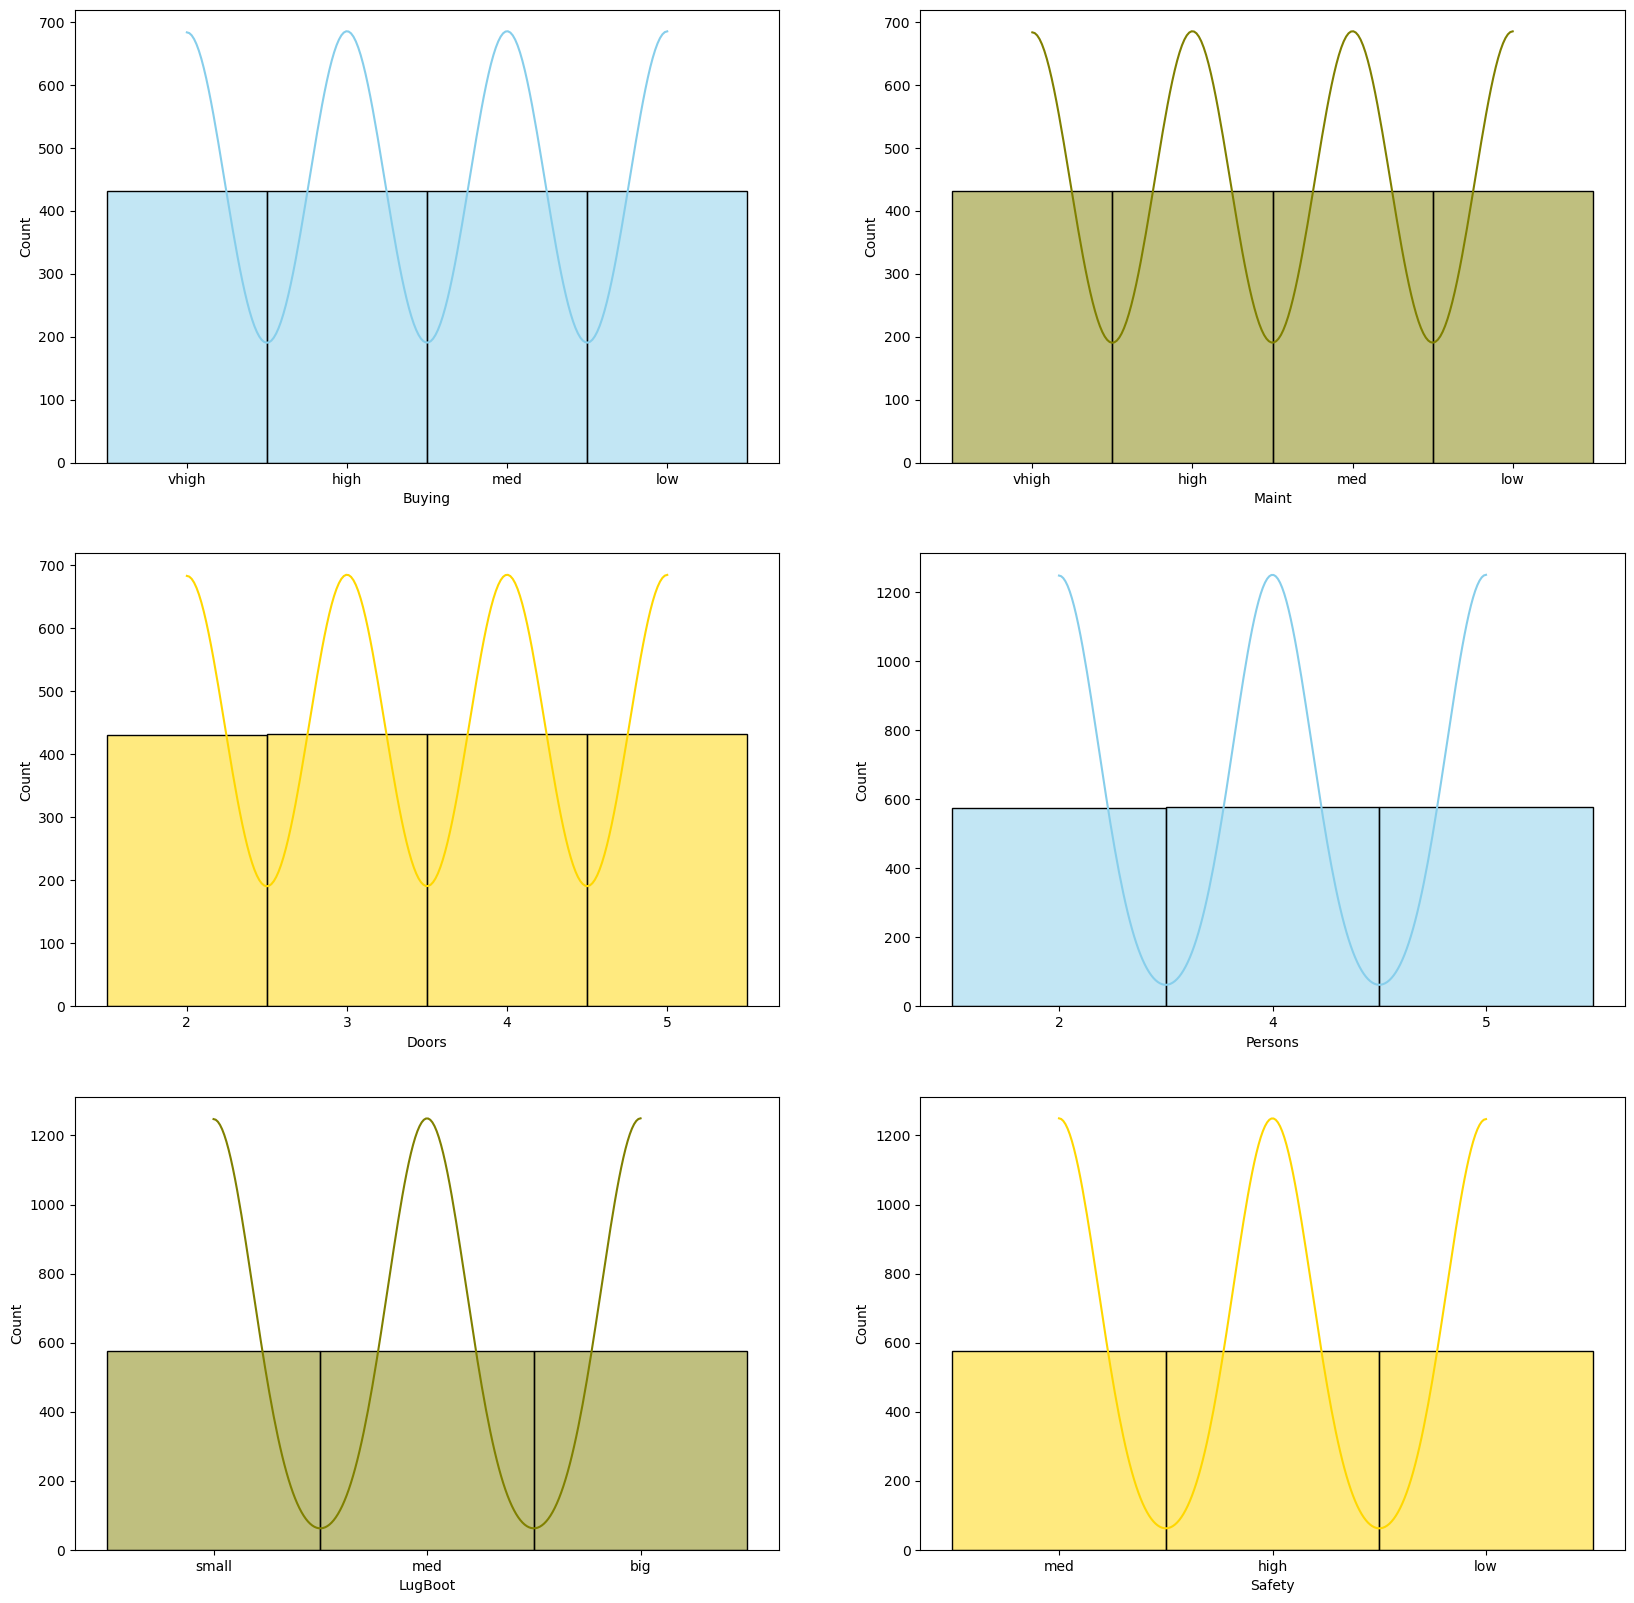

In [17]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

sns.histplot(data=a["Buying"], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=a["Maint"], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=a["Doors"], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=a["Persons"], kde=True, color="skyblue", ax=axs[1, 1])
sns.histplot(data=a["LugBoot"], kde=True, color="olive", ax=axs[2, 0])
sns.histplot(data=a["Safety"], kde=True, color="gold", ax=axs[2, 1])




In [18]:
features = a.iloc[:,:-1]
features[:5]
a1=[]
for i in features:
    a1.append(features[i].value_counts())

In [19]:
buy = pd.crosstab(a['Buying'], a['Evaluation'])
mc = pd.crosstab(a['Maint'], a['Evaluation'])
drs = pd.crosstab(a['Doors'], a['Evaluation'])
prsn = pd.crosstab(a['Persons'], a['Evaluation'])
lb = pd.crosstab(a['LugBoot'], a['Evaluation'])
sfty = pd.crosstab(a['Safety'], a['Evaluation'])

In [20]:
buy

Evaluation,acc,good,unacc,vgood
Buying,,,,
high,108,0,324,0
low,89,46,258,39
med,115,23,268,26
vhigh,72,0,359,0


In [21]:
data = [
    go.Bar(
        x=a1[0].index, # assign x as the dataframe column 'x'
        y=buy['unacc'],
        name='Unacceptable'
    ),
    go.Bar(
        x=a1[0].index,
        y=buy['acc'],
        name='Acceptable'
    ),
    go.Bar(
        x=a1[0].index,
        y=buy['good'],
        name='Good'
    ),
    go.Bar(
        x=a1[0].index,
        y=buy['vgood'],
        name='Very Good'
    )

]

layout = go.Layout(
    barmode='stack',
    title='Selling Price vs Evaluation'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='distri')

In [22]:
data = [
    go.Bar(
        x=a1[0].index, # assign x as the dataframe column 'x'
        y=mc['unacc'],
        name='Unacceptable'
    ),
    go.Bar(
        x=a1[0].index,
        y=mc['acc'],
        name='Acceptable'
    ),
    go.Bar(
        x=a1[0].index,
        y=mc['good'],
        name='Good'
    ),
    go.Bar(
        x=a1[0].index,
        y=mc['vgood'],
        name='Very Good'
    )

]

layout = go.Layout(
    barmode='stack',
    title='Maintainance cost vs Evaluation'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='cars_donut')

In [23]:
data = [
    go.Bar(
        x=a1[2].index, # assign x as the dataframe column 'x'
        y=drs['unacc'],
        name='Unacceptable'
    ),
    go.Bar(
        x=a1[2].index,
        y=drs['acc'],
        name='Acceptable'
    ),
    go.Bar(
        x=a1[2].index,
        y=drs['good'],
        name='Good'
    ),
    go.Bar(
        x=a1[2].index,
        y=drs['vgood'],
        name='Very Good'
    )

]

layout = go.Layout(
    barmode='stack',
    title='Doors vs Evaluation'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='cars_donut')

In [24]:
data = [
    go.Bar(
        x=a1[3].index, # assign x as the dataframe column 'x'
        y=prsn['unacc'],
        name='Unacceptable'
    ),
    go.Bar(
        x=a1[3].index,
        y=prsn['acc'],
        name='Acceptable'
    ),
    go.Bar(
        x=a1[3].index,
        y=prsn['good'],
        name='Good'
    ),
    go.Bar(
        x=a1[3].index,
        y=prsn['vgood'],
        name='Very Good'
    )

]

layout = go.Layout(
    barmode='stack',
    title='Number of Passengers vs Evaluation'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='cars_donut')

In [25]:
data = [
    go.Bar(
        x=a1[4].index, # assign x as the dataframe column 'x'
        y=lb['unacc'],
        name='Unacceptable'
    ),
    go.Bar(
        x=a1[4].index,
        y=lb['acc'],
        name='Acceptable'
    ),
    go.Bar(
        x=a1[4].index,
        y=lb['good'],
        name='Good'
    ),
    go.Bar(
        x=a1[4].index,
        y=lb['vgood'],
        name='Very Good'
    )

]

layout = go.Layout(
    barmode='stack',
    title='Luggage Boot vs Evaluation'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='cars_donut')

In [26]:
data = [
    go.Bar(
        x=a1[4].index, # assign x as the dataframe column 'x'
        y=lb['unacc'],
        name='Unacceptable'
    ),
    go.Bar(
        x=a1[4].index,
        y=lb['acc'],
        name='Acceptable'
    ),
    go.Bar(
        x=a1[4].index,
        y=lb['good'],
        name='Good'
    ),
    go.Bar(
        x=a1[4].index,
        y=lb['vgood'],
        name='Very Good'
    )

]

layout = go.Layout(
    barmode='stack',
    title='Luggage Boot vs Evaluation'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='cars_donut')

In [27]:
a

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5,5,med,med,good
1723,low,low,5,5,med,high,vgood
1724,low,low,5,5,big,low,unacc
1725,low,low,5,5,big,med,good


In [28]:
# splitting x(inputs) and y(outputs)

x=a.drop(['Evaluation'],axis=1)
y=a["Evaluation"]
x

,Buying,Maint,Doors,Persons,LugBoot,Safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5,5,med,med
1723,low,low,5,5,med,high
1724,low,low,5,5,big,low
1725,low,low,5,5,big,med


In [29]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: Evaluation, Length: 1727, dtype: object

In [30]:
#Using pandas dummies function to encode the data into categorical data

x = pd.get_dummies(x, prefix_sep='_', drop_first=True)

In [31]:
x

,Buying_low,Buying_med,Buying_vhigh,Maint_low,Maint_med,Maint_vhigh,Doors_3,Doors_4,Doors_5,Persons_4,Persons_5,LugBoot_med,LugBoot_small,Safety_low,Safety_med
0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
3,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1
1723,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0
1724,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1725,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1


In [32]:
# Splitting Training and Testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [33]:
# Preprocessing Steps

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test-scalar.fit_transform(x_test)

,Buying_low,Buying_med,Buying_vhigh,Maint_low,Maint_med,Maint_vhigh,Doors_3,Doors_4,Doors_5,Persons_4,Persons_5,LugBoot_med,LugBoot_small,Safety_low,Safety_med
1318,-0.690309,0.588043,0.563093,0.520181,0.598741,-0.558387,0.580914,0.548821,0.588043,0.707107,-0.385250,-0.364158,0.685119,0.718185,0.638096
124,0.591608,0.588043,-0.775907,0.520181,0.598741,0.641689,0.580914,0.548821,0.588043,-0.414214,0.721891,0.733053,0.685119,0.718185,0.638096
648,0.591608,0.588043,0.563093,0.520181,-0.670172,0.641689,0.580914,0.548821,0.588043,0.707107,0.721891,0.733053,-0.459601,0.718185,-0.567163
249,0.591608,0.588043,-0.775907,0.520181,-0.670172,0.641689,-0.721425,0.548821,0.588043,0.707107,0.721891,0.733053,0.685119,0.718185,-0.567163
1598,-0.690309,0.588043,0.563093,0.520181,-0.670172,0.641689,0.580914,0.548821,-0.700556,0.707107,0.721891,0.733053,0.685119,-0.392399,0.638096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,0.591608,-0.700556,0.563093,0.520181,0.598741,-0.558387,0.580914,0.548821,-0.700556,-0.414214,0.721891,0.733053,0.685119,0.718185,-0.567163
814,0.591608,0.588043,0.563093,-0.922408,0.598741,0.641689,0.580914,-0.822087,0.588043,0.707107,0.721891,-0.364158,0.685119,0.718185,0.638096
752,0.591608,0.588043,0.563093,0.520181,-0.670172,0.641689,0.580914,0.548821,-0.700556,0.707107,-0.385250,0.733053,0.685119,-0.392399,0.638096
744,0.591608,0.588043,0.563093,0.520181,-0.670172,0.641689,0.580914,0.548821,-0.700556,-0.414214,0.721891,0.733053,0.685119,0.718185,-0.567163


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [35]:
#Using logistic regression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
lr_train_acc=lr.score(x_train, y_train)
lr_test_acc=lr.score(x_test, y_test)
print("Training Accuracy: ",lr_train_acc)
print("Testing Accuracy: ", lr_test_acc)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('The Accuracy Score is',accuracy_score(y_test,y_pred))
print('Classification Report is',classification_report(y_test,y_pred))

Training Accuracy:  0.9374517374517375
Testing Accuracy:  0.7384259259259259
[[ 21   0  75   0]
 [ 18   0   0   0]
 [  0   0 298   0]
 [ 20   0   0   0]]
The Accuracy Score is 0.7384259259259259
Classification Report is               precision    recall  f1-score   support

         acc       0.36      0.22      0.27        96
        good       0.00      0.00      0.00        18
       unacc       0.80      1.00      0.89       298
       vgood       0.00      0.00      0.00        20

    accuracy                           0.74       432
   macro avg       0.29      0.30      0.29       432
weighted avg       0.63      0.74      0.67       432



Here we implement 5 classification models

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
#Using KNN classifier

knn= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_train_acc=knn.score(x_train, y_train)
knn_test_acc=knn.score(x_test, y_test)
print("Training Accuracy: ",knn_train_acc)
print("Testing Accuracy: ", knn_test_acc)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('The Accuracy Score is',accuracy_score(y_test,y_pred))
print('Classification Report is',classification_report(y_test,y_pred))


Training Accuracy:  0.8849420849420849
Testing Accuracy:  0.8518518518518519
[[ 68   3  25   0]
 [ 15   0   3   0]
 [  2   0 296   0]
 [ 10   4   2   4]]
The Accuracy Score is 0.8518518518518519
Classification Report is               precision    recall  f1-score   support

         acc       0.72      0.71      0.71        96
        good       0.00      0.00      0.00        18
       unacc       0.91      0.99      0.95       298
       vgood       1.00      0.20      0.33        20

    accuracy                           0.85       432
   macro avg       0.66      0.48      0.50       432
weighted avg       0.83      0.85      0.83       432



In [38]:
#Using Decision Tree classifier
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
dt_train_acc=dt.score(x_train, y_train)
dt_test_acc=dt.score(x_test, y_test)

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred)) 
print('Training Score: ', dt_train_acc)
print('Testing Score: ', dt_test_acc)
print('The Accuracy Score is',accuracy_score(y_test,y_pred))
print('Classification Report is',classification_report(y_test,y_pred))

Confusion Matrix: 
 [[ 89   0   7   0]
 [ 13   0   0   5]
 [ 38   0 260   0]
 [ 14   0   0   6]]
Training Score:  0.8355212355212355
Testing Score:  0.8217592592592593
The Accuracy Score is 0.8217592592592593
Classification Report is               precision    recall  f1-score   support

         acc       0.58      0.93      0.71        96
        good       0.00      0.00      0.00        18
       unacc       0.97      0.87      0.92       298
       vgood       0.55      0.30      0.39        20

    accuracy                           0.82       432
   macro avg       0.52      0.52      0.50       432
weighted avg       0.83      0.82      0.81       432



In [39]:
# using Random Forest Classifier
rf = RandomForestClassifier(n_estimators= 150, max_depth= 5)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
rf_train_acc = rf.score(x_train, y_train) 
rf_test_acc = rf.score(x_test, y_test)

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Training Score: ', rf_train_acc)
print('Testing Score: ', rf_test_acc)
print('The Accuracy Score is',accuracy_score(y_test,y_pred))
print('Classification Report is',classification_report(y_test,y_pred))

Confusion Matrix: 
 [[ 23   0  73   0]
 [  6   0  12   0]
 [  1   0 297   0]
 [ 10   0  10   0]]
Training Score:  0.7822393822393823
Testing Score:  0.7407407407407407
The Accuracy Score is 0.7407407407407407
Classification Report is               precision    recall  f1-score   support

         acc       0.57      0.24      0.34        96
        good       0.00      0.00      0.00        18
       unacc       0.76      1.00      0.86       298
       vgood       0.00      0.00      0.00        20

    accuracy                           0.74       432
   macro avg       0.33      0.31      0.30       432
weighted avg       0.65      0.74      0.67       432



In [40]:
# Using Support Vector Classifier
svc=SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
svc_train_acc = svc.score(x_train, y_train) 
svc_test_acc = svc.score(x_test, y_test)

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Training Score: ', svc_train_acc)
print('Testing Score: ', svc_test_acc)
print('The Accuracy Score is',accuracy_score(y_test,y_pred))
print('Classification Report is',classification_report(y_test,y_pred))

Confusion Matrix: 
 [[ 68   0  28   0]
 [ 18   0   0   0]
 [  1   0 297   0]
 [ 19   1   0   0]]
Training Score:  0.9768339768339769
Testing Score:  0.8449074074074074
The Accuracy Score is 0.8449074074074074
Classification Report is               precision    recall  f1-score   support

         acc       0.64      0.71      0.67        96
        good       0.00      0.00      0.00        18
       unacc       0.91      1.00      0.95       298
       vgood       0.00      0.00      0.00        20

    accuracy                           0.84       432
   macro avg       0.39      0.43      0.41       432
weighted avg       0.77      0.84      0.81       432



In [41]:
# using GaussianNB classifier

gnb=SVC()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
gnb_train_acc = gnb.score(x_train, y_train) 
gnb_test_acc = gnb.score(x_test, y_test)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Training Score: ', gnb_train_acc)
print('Testing Score: ', gnb_test_acc)
print('The Accuracy Score is',accuracy_score(y_test,y_pred))
print('Classification Report is',classification_report(y_test,y_pred))

Confusion Matrix: 
 [[ 68   0  28   0]
 [ 18   0   0   0]
 [  1   0 297   0]
 [ 19   1   0   0]]
Training Score:  0.9768339768339769
Testing Score:  0.8449074074074074
The Accuracy Score is 0.8449074074074074
Classification Report is               precision    recall  f1-score   support

         acc       0.64      0.71      0.67        96
        good       0.00      0.00      0.00        18
       unacc       0.91      1.00      0.95       298
       vgood       0.00      0.00      0.00        20

    accuracy                           0.84       432
   macro avg       0.39      0.43      0.41       432
weighted avg       0.77      0.84      0.81       432



In [42]:
x = ['Logistic Regression', 'KNN', 'Decision Tree Classifier','Random Forest Classifier','Support Vector Classifier','GaussianNB']
y1 = [lr_train_acc, knn_train_acc,dt_train_acc,rf_train_acc,svc_train_acc, gnb_train_acc]
y2 = [lr_test_acc, knn_test_acc,dt_test_acc,rf_test_acc,svc_test_acc, gnb_test_acc]

trace1 = go.Bar(x = x, y = y1, name = 'Training Accuracy', marker = dict(color = 'cyan'))
trace2 = go.Bar(x = x, y = y2, name = 'Testing Accuracy', marker = dict(color = 'violet'))
data = [trace1,trace2]
layout = go.Layout(title = 'Accuracy Plot', width = 750)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)